Estadística de la longitud de los transcriptomas extraídos.<br>
Se ha generado para ello una tabla adicional para los features de las secuencias. Se va a proceder a poblar esta tabla.

In [4]:
import mysql.connector

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="root",
   passwd=""
)
cursor = conn.cursor()

query = "SELECT id_especie FROM maestra_especies"
cursor.execute(query)
especies = cursor.fetchall()
for especie in especies:
    print("\r", "features para " + str(especie[0]), end="")
    query = "INSERT INTO secuencias_features (id_especie, cod_secuencia, flg_pct, flg_seleccionado, longitud) SELECT id_especie, cod_secuencia, flg_pct, flg_seleccionado, LENGTH(secuencia) FROM secuencias WHERE id_especie = %s"
    cursor.execute(query, [especie[0]])

print("\r", "proceso finalizado", end="")
conn.close()

 proceso finalizado

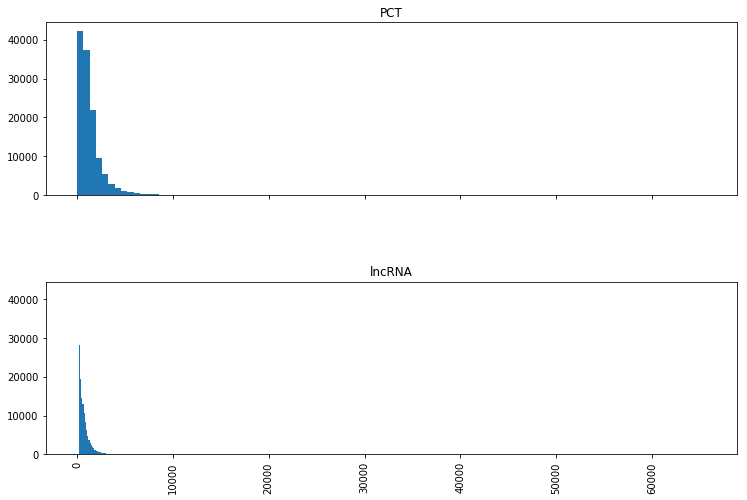

In [30]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="root",
   passwd=""
)

query = "SELECT id_especie, longitud, CASE WHEN flg_pct = 1 THEN 'PCT' ELSE 'lncRNA' END AS flg_pct FROM secuencias_features WHERE flg_seleccionado = 1"
df = pd.read_sql_query(query, conn)
df.hist(by='flg_pct', column='longitud', bins=100, sharex=True, sharey = True, layout=(2,1), figsize=(12,8))

conn.close()

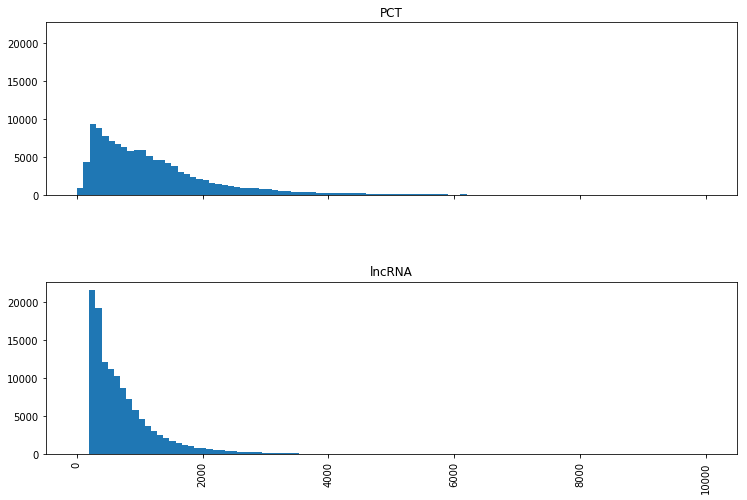

In [31]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="root",
   passwd=""
)

query = "SELECT id_especie, longitud, CASE WHEN flg_pct = 1 THEN 'PCT' ELSE 'lncRNA' END AS flg_pct FROM secuencias_features WHERE flg_seleccionado = 1"
query = query + " AND longitud < 10000"
df = pd.read_sql_query(query, conn)
df.hist(by='flg_pct', column='longitud', bins=100, sharex=True, sharey = True, layout=(2,1), figsize=(12,8))

conn.close()

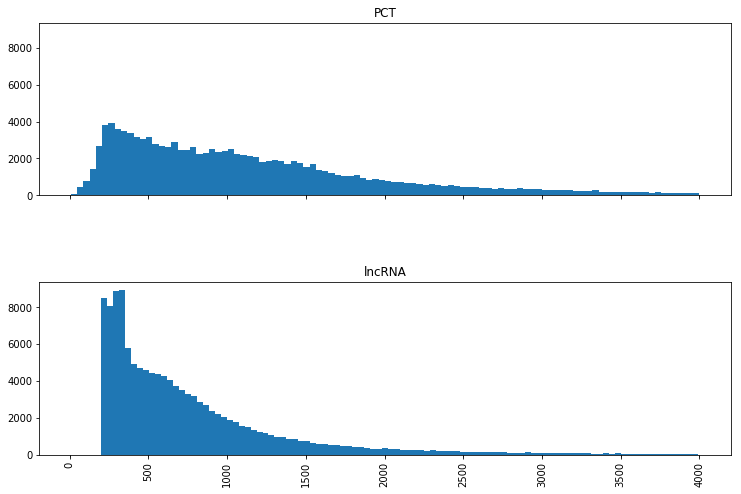

In [32]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="root",
   passwd=""
)

query = "SELECT id_especie, longitud, CASE WHEN flg_pct = 1 THEN 'PCT' ELSE 'lncRNA' END AS flg_pct FROM secuencias_features WHERE flg_seleccionado = 1"
query = query + " AND longitud < 4000"
df = pd.read_sql_query(query, conn)
df.hist(by='flg_pct', column='longitud', bins=100, sharex=True, sharey = True, layout=(2,1), figsize=(12,8))

conn.close()